# Keep-it-dry! Preprocessing Part 3: Imbalance Handling
Here, we will try different imbalance handling methods to make our training data more balanced:
1. Random oversampler (RO)
2. Random undersampler (RU)
3. SMOTENC
4. RU x RO

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.under_sampling import RandomUnderSampler

In [81]:
def random_oversample(X, y):
  """
  Oversamples the minority class using random oversampling.

  Args:
      X: Features (data matrix).
      y: Target labels.

  Returns:
      X_resampled: Oversampled features.
      y_resampled: Oversampled target labels.
  """
  ros = RandomOverSampler(random_state=42)
  X_resampled, y_resampled = ros.fit_resample(X, y)
  return X_resampled, y_resampled

def random_undersample(X, y):
  """
  Undersamples the majority class using random undersampling.

  Args:
      X: Features (data matrix).
      y: Target labels.

  Returns:
      X_resampled: Undersampled features.
      y_resampled: Undersampled target labels.
  """
  rus = RandomUnderSampler(random_state=42)
  X_resampled, y_resampled = rus.fit_resample(X, y)
  return X_resampled, y_resampled

def smotenc(X, y, categorical_features=[]):
  """
  Applies SMOTENC (combination of SMOTE and EN) for oversampling.

  Args:
      X: Features (data matrix).
      y: Target labels.

  Returns:
      X_resampled: Oversampled features using SMOTENC.
      y_resampled: Oversampled target labels using SMOTENC.
  """
  smote_enc = SMOTENC(categorical_features=categorical_features, random_state=42)
  X_resampled, y_resampled = smote_enc.fit_resample(X, y)
  return X_resampled, y_resampled

def combined_over_under(X, y, oversample_ratio=1.0, undersample_ratio=0.5):
  """
  Combines random oversampling and undersampling.

  Args:
      X: Features (data matrix).
      y: Target labels.
      oversample_ratio: Ratio by which to oversample the minority class (default: 1.0 - no oversampling).
      undersample_ratio: Ratio by which to undersample the majority class (default: 0.5).

  Returns:
      X_resampled: Combined resampled features.
      y_resampled: Combined resampled target labels.
  """
  if oversample_ratio > 1.0:
    raise ValueError("oversample_ratio cannot be greater than 1.0")
  if undersample_ratio <= 0.0:
    raise ValueError("undersample_ratio must be greater than 0.0")

  # Oversample if needed
  if oversample_ratio > 0.0:
    X_temp, y_temp = random_oversample(X, y)
  else:
    X_temp, y_temp = X, y

  # Undersample the majority class
  rus = RandomUnderSampler(sampling_strategy=undersample_ratio, random_state=42)
  X_resampled, y_resampled = rus.fit_resample(X_temp, y_temp)
  return X_resampled, y_resampled

from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN

def smote(X, y):
  """
  Oversamples the minority class using SMOTE.

  Args:
      X (numpy.ndarray): Features (data points).
      y (numpy.ndarray): Target labels.

  Returns:
      tuple: (X_resampled, y_resampled) - Resampled features and target labels.
  """

  # Create the SMOTE object
  smote = SMOTE(random_state=42)

  # Overample the data
  X_resampled, y_resampled = smote.fit_resample(X, y)

  return X_resampled, y_resampled

def adasyn(X, y):
  """
  Oversamples the minority class using ADASYN.

  Args:
      X (numpy.ndarray): Features (data points).
      y (numpy.ndarray): Target labels.

  Returns:
      tuple: (X_resampled, y_resampled) - Resampled features and target labels.
  """
  
  # Create the ADASYN object
  adasyn = ADASYN(random_state=42)

  # Overample the data
  X_resampled, y_resampled = adasyn.fit_resample(X, y)

  return X_resampled, y_resampled


In [26]:
# Let's use kid_train_ii_ro_csv and kid_train_ki_ro_csv
X_ii = pd.read_csv('kid_train_ii_ro.csv', index_col=0)
X_ki = pd.read_csv('kid_train_ki_ro.csv', index_col=0)

y_ii = X_ii.pop('failure')
y_ki = X_ki.pop('failure')

In [27]:
X_ii.dtypes

id                  int64
product_code       object
loading           float64
attribute_0       float64
attribute_1       float64
attribute_2         int64
attribute_3         int64
measurement_0     float64
measurement_1     float64
measurement_2     float64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
product_code_A    float64
product_code_B    float64
product_code_C    float64
product_code_D    float64
product_code_E    float64
dtype: object

In [28]:
X_ii.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'product_code_A', 'product_code_B', 'product_code_C', 'product_code_D',
       'product_code_E'],
      dtype='object')

In [29]:
to_drop = ['id','product_code', 'product_code_A', 'product_code_B', 'product_code_C', 'product_code_D', 'product_code_E']
X_ii_dropped = X_ii.drop(to_drop, axis=1)
X_ki_dropped = X_ki.drop(to_drop, axis=1)

In [32]:
X_ii_dropped.dtypes

loading           float64
attribute_0       float64
attribute_1       float64
attribute_2         int64
attribute_3         int64
measurement_0     float64
measurement_1     float64
measurement_2     float64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
dtype: object

## Random Over Sampler (ROS)

In [30]:
X_ii_ros, y_ii_ros = random_oversample(X_ii_dropped, y_ii)
X_ki_ros, y_ki_ros = random_oversample(X_ki_dropped, y_ii)

In [31]:
df_ii = pd.concat([X_ii_ros, y_ii_ros], axis=1)
df_ki = pd.concat([X_ki_ros, y_ki_ros], axis=1)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

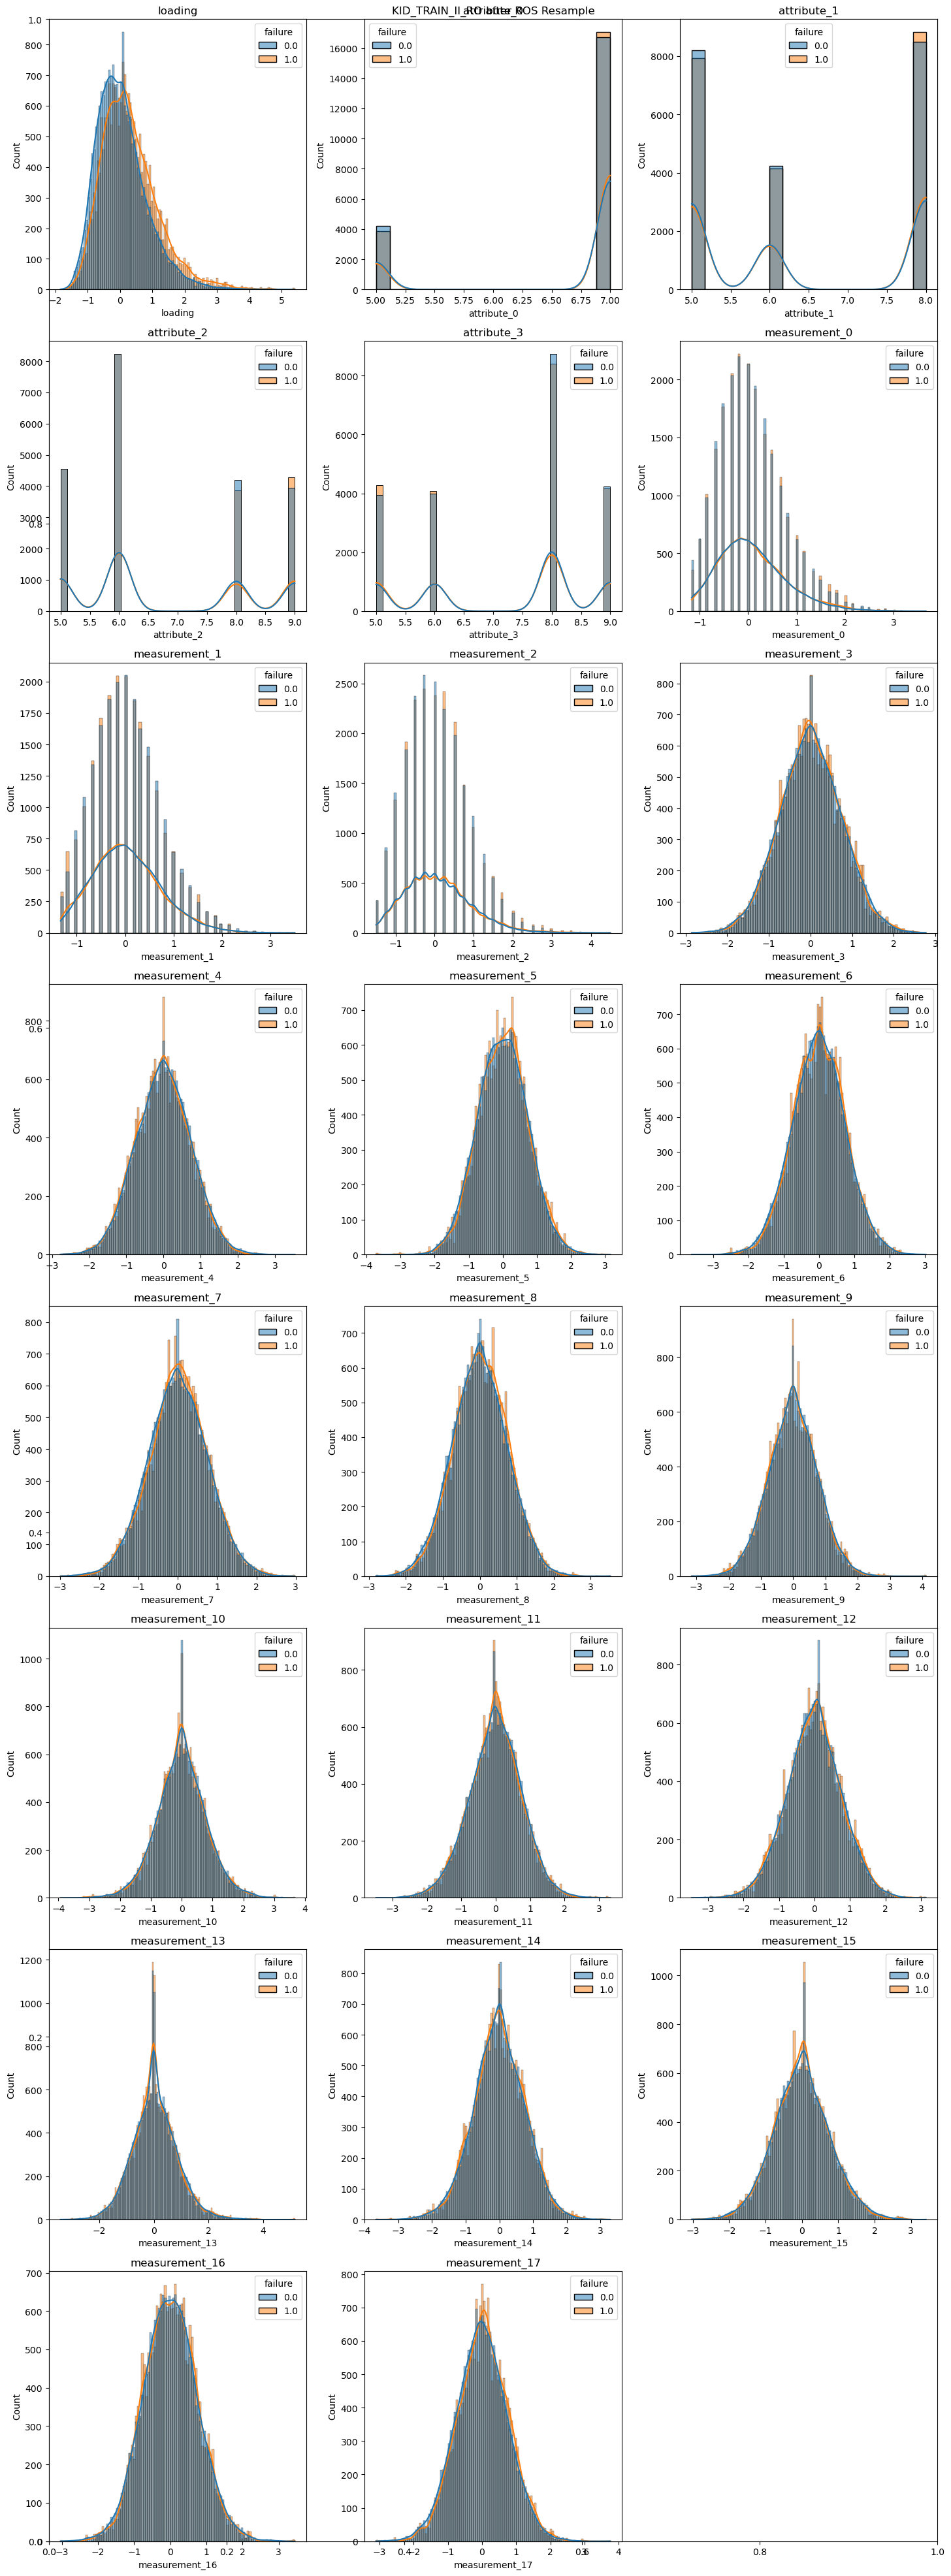

In [39]:
fig = plt.figure(figsize=(15, 40))
plt.title("KID_TRAIN_II_RO after ROS Resample")

for i, feat in enumerate(df_ii.columns[:-1]):
    ax = fig.add_subplot(8, 3, i+1)
    sns.histplot(data=df_ii, x=feat, hue="failure", kde=True, axes=ax)
    ax.set_title(feat)

fig.tight_layout()
plt.show()

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

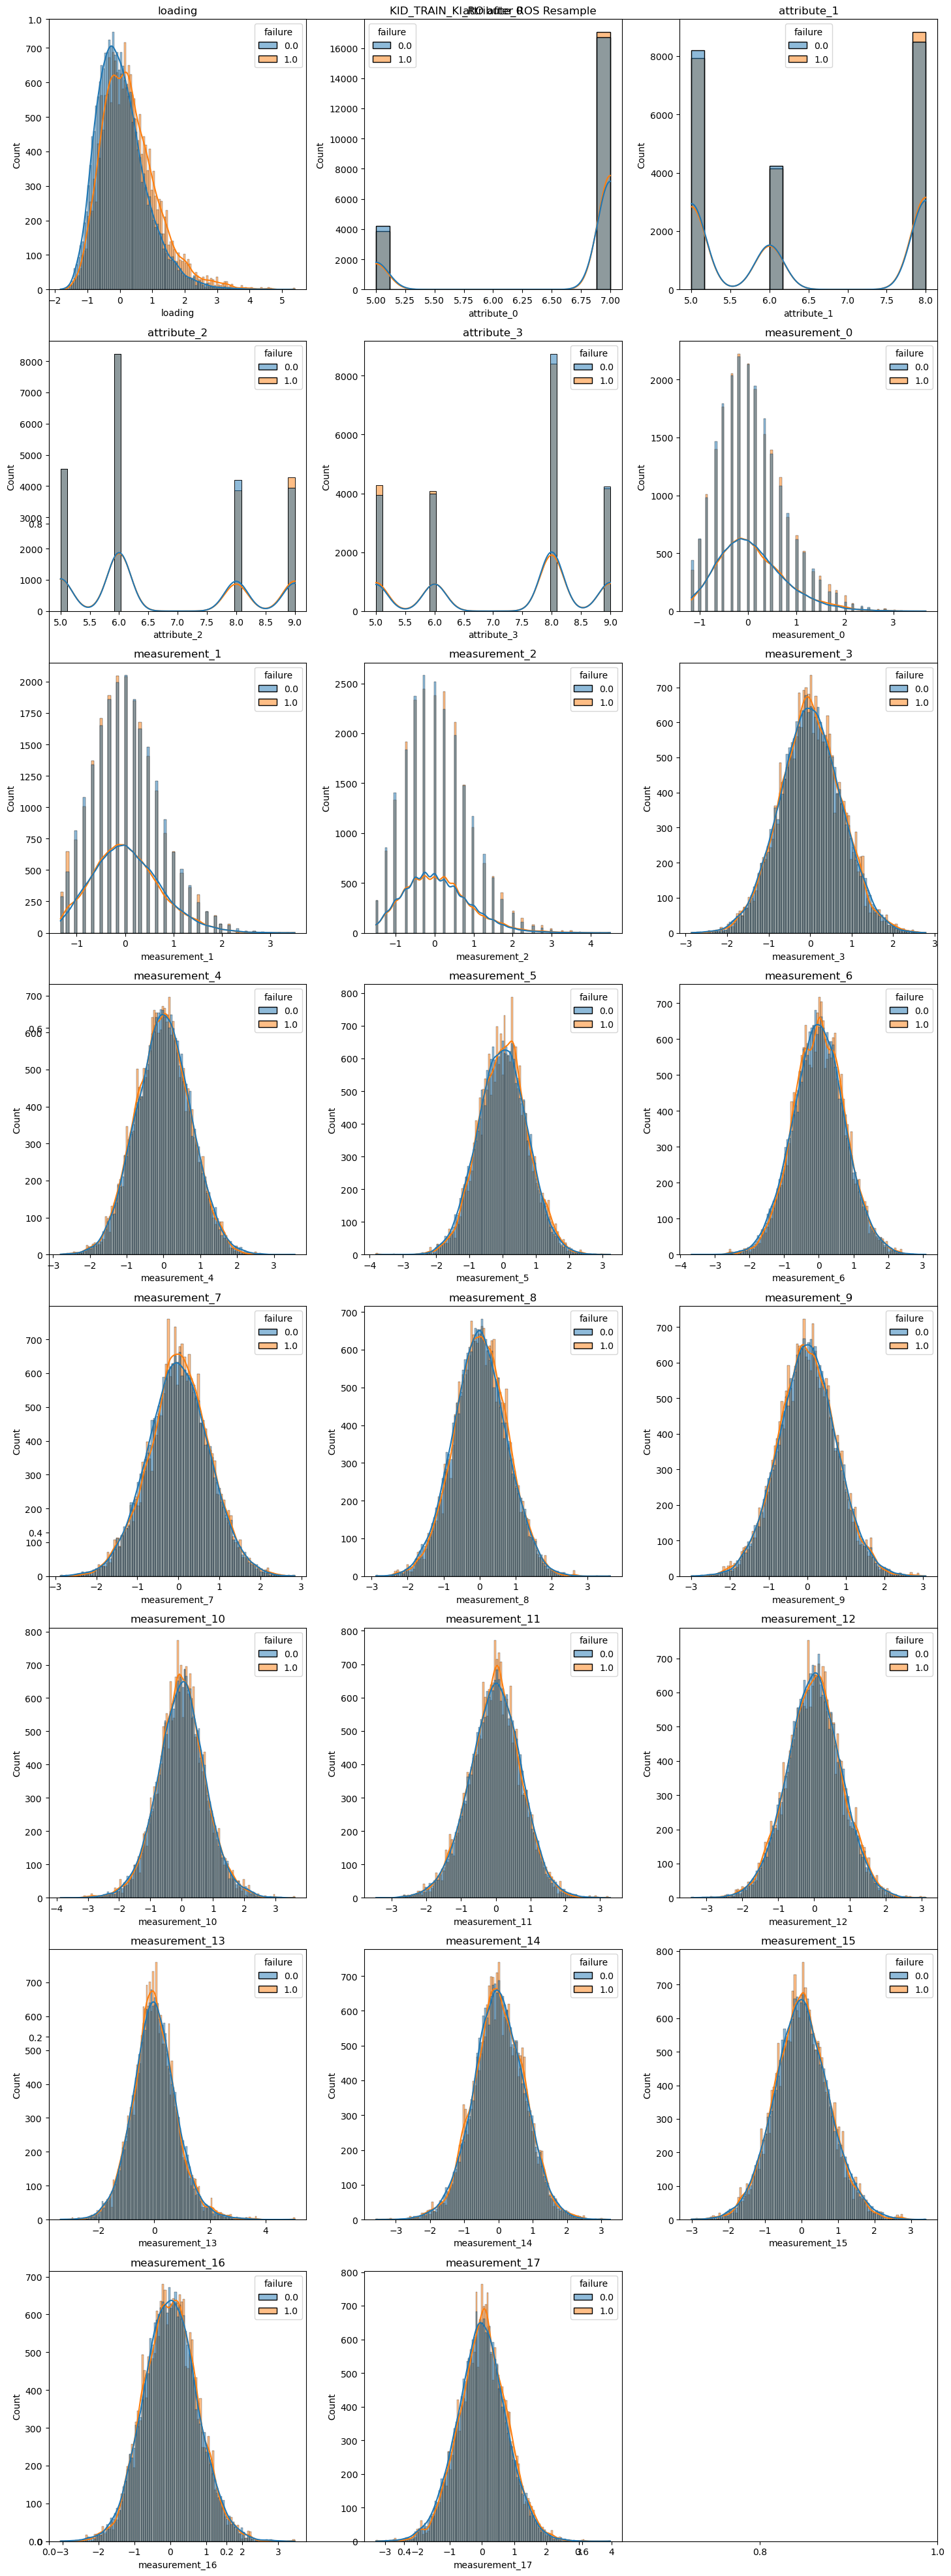

In [40]:
fig = plt.figure(figsize=(15, 40))
plt.title("KID_TRAIN_KI_RO after ROS Resample")

for i, feat in enumerate(df_ki.columns[:-1]):
    ax = fig.add_subplot(8, 3, i+1)
    sns.histplot(data=df_ki, x=feat, hue="failure", kde=True, axes=ax)
    ax.set_title(feat)

fig.tight_layout()
plt.show()

### ROS Export

In [41]:
df_ii.to_csv('kid_train_ii_ro_ros.csv')
df_ki.to_csv('kid_train_ki_ro_ros.csv')

## Random Under Sampler (RUS)

In [42]:
X_ii_rus, y_ii_rus = random_undersample(X_ii_dropped, y_ii)
X_ki_rus, y_ki_rus = random_undersample(X_ki_dropped, y_ii)

In [43]:
df_ii_rus = pd.concat([X_ii_rus, y_ii_rus], axis=1)
df_ki_rus = pd.concat([X_ki_rus, y_ki_rus], axis=1)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

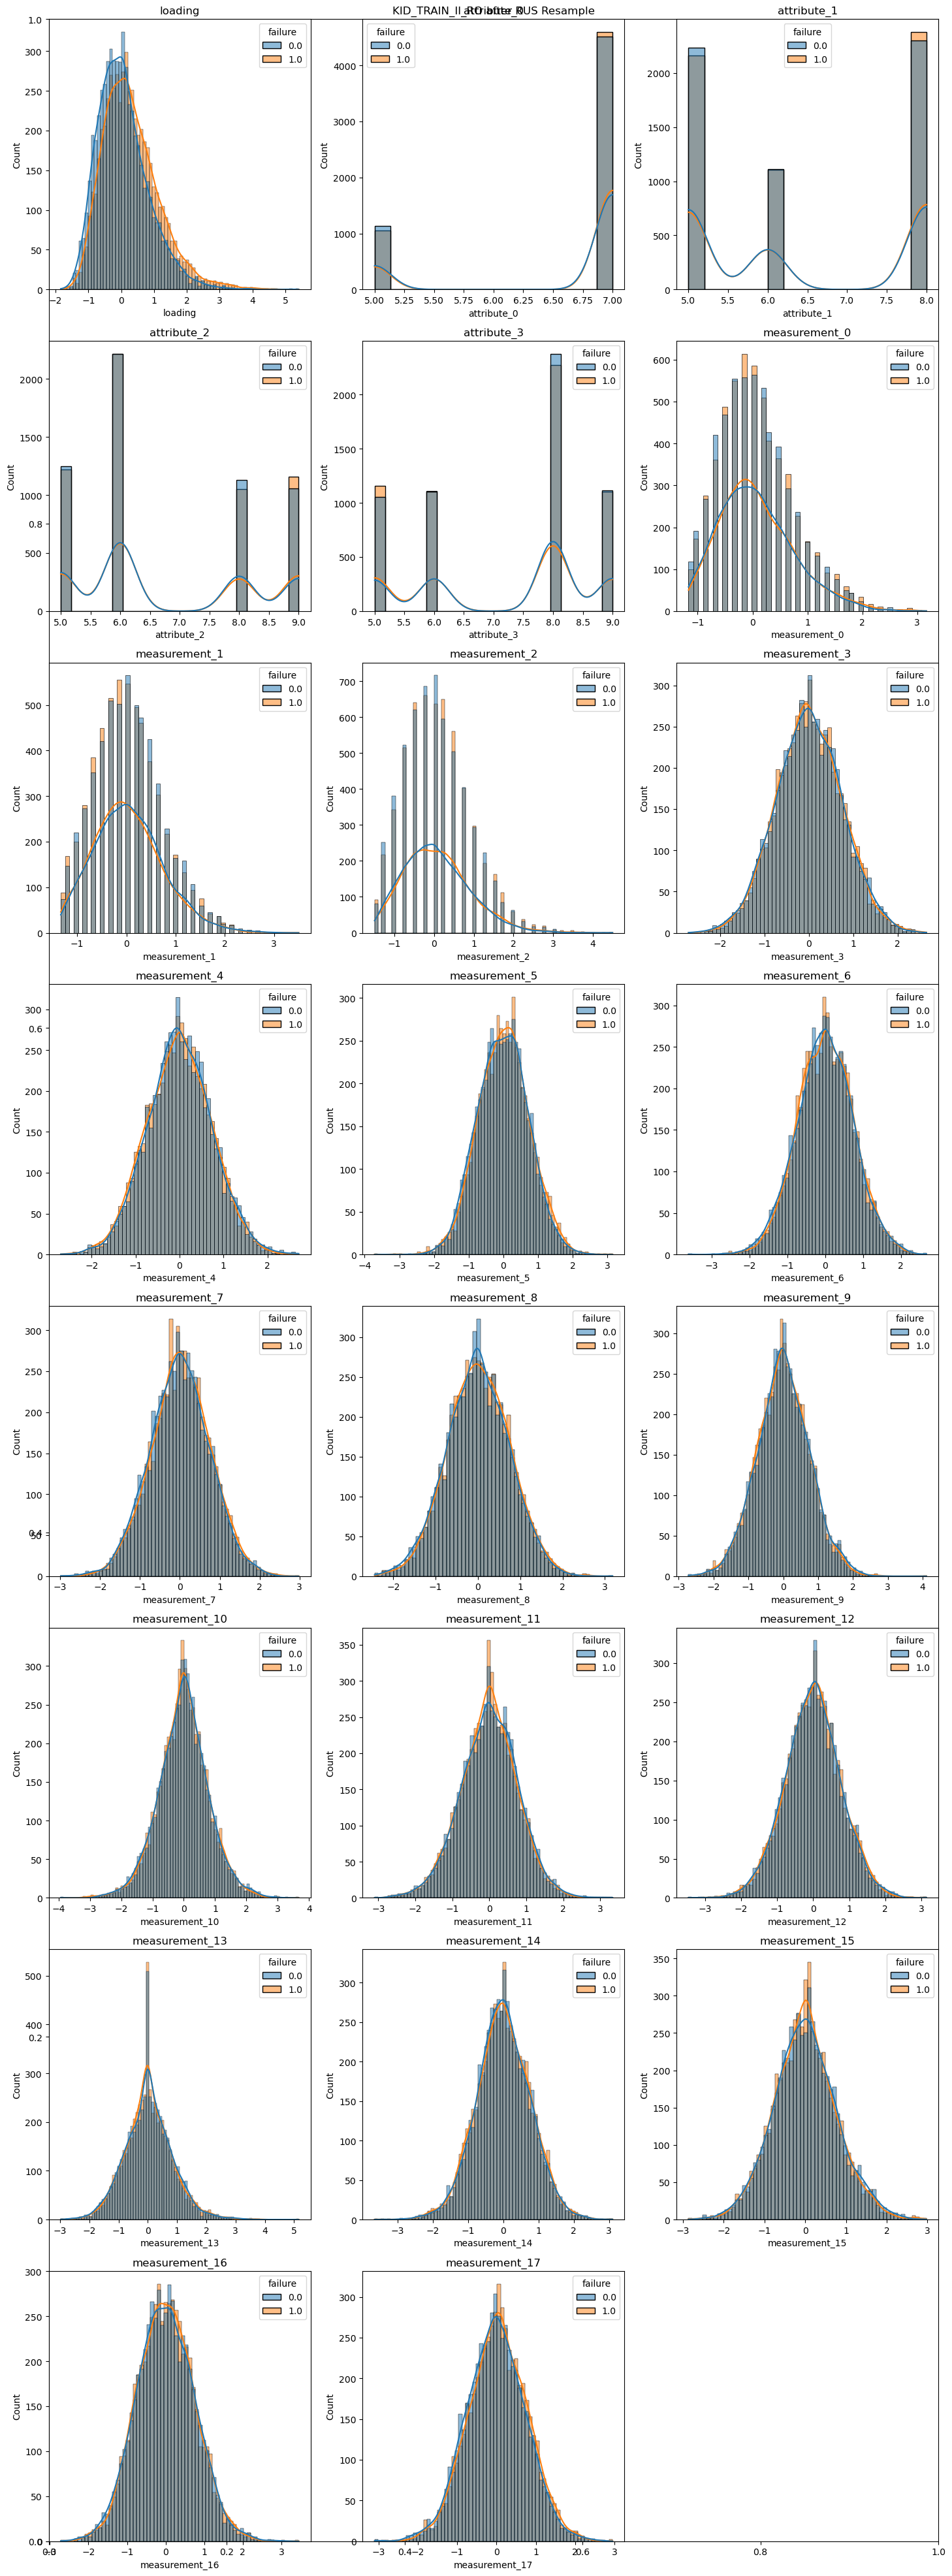

In [45]:
fig = plt.figure(figsize=(15, 40))
plt.title("KID_TRAIN_II_RO after RUS Resample")

for i, feat in enumerate(df_ii_rus.columns[:-1]):
    ax = fig.add_subplot(8, 3, i+1)
    sns.histplot(data=df_ii_rus, x=feat, hue="failure", kde=True, axes=ax)
    ax.set_title(feat)

fig.tight_layout()
plt.show()

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

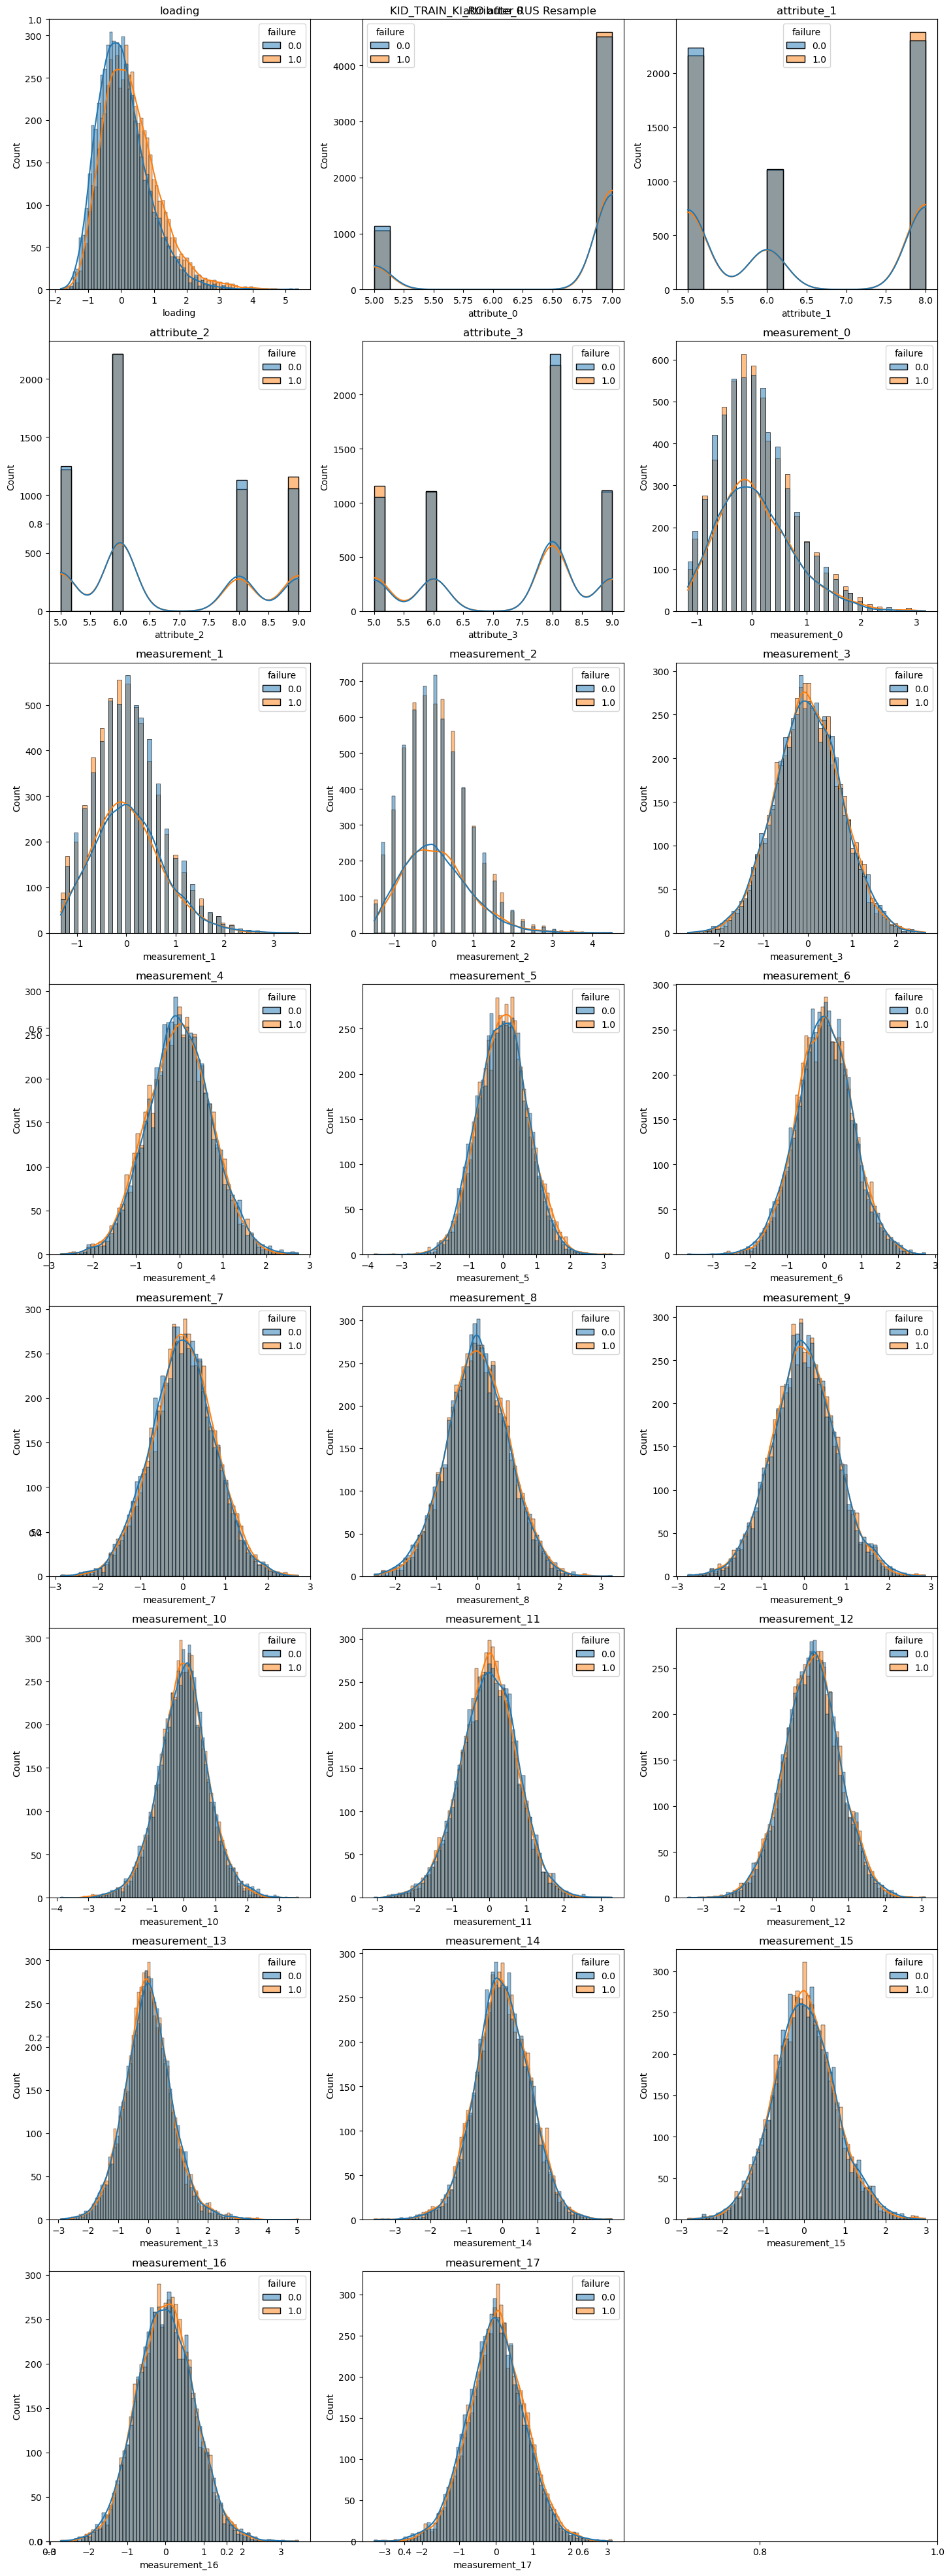

In [46]:
fig = plt.figure(figsize=(15, 40))
plt.title("KID_TRAIN_KI_RO after RUS Resample")

for i, feat in enumerate(df_ki_rus.columns[:-1]):
    ax = fig.add_subplot(8, 3, i+1)
    sns.histplot(data=df_ki_rus, x=feat, hue="failure", kde=True, axes=ax)
    ax.set_title(feat)

fig.tight_layout()
plt.show()

### RUS Export

In [47]:
df_ii_rus.to_csv('kid_train_ii_ro_rus.csv')
df_ki_rus.to_csv('kid_train_ki_ro_rus.csv')

## SMOTENC v.1
Let's just treat ['attribute0', 'attribute1', 'attribute2', 'attribute3'] as it is using SMOTENC 'auto' categorical features, let's see.

In [50]:
to_drop_smotenc_1 = ['id', 'product_code_A', 'product_code_B', 'product_code_C', 'product_code_D', 'product_code_E']
cat_feats_smotenc_1 = ['product_code']

X_ii_dropped_smotenc_1 = X_ii.drop(to_drop_smotenc_1, axis=1)
X_ki_dropped_smotenc_1 = X_ki.drop(to_drop_smotenc_1, axis=1)

X_ii_smotenc_1, y_ii_smotenc_1 = smotenc(X_ii_dropped_smotenc_1, y_ii, categorical_features=cat_feats_smotenc_1)
X_ki_smotenc_1, y_ki_smotenc_1 = smotenc(X_ki_dropped_smotenc_1, y_ii, categorical_features=cat_feats_smotenc_1)

In [51]:
df_ii_smotenc_1 = pd.concat([X_ii_smotenc_1, y_ii_smotenc_1], axis=1)
df_ki_smotenc_1 = pd.concat([X_ki_smotenc_1, y_ki_smotenc_1], axis=1)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

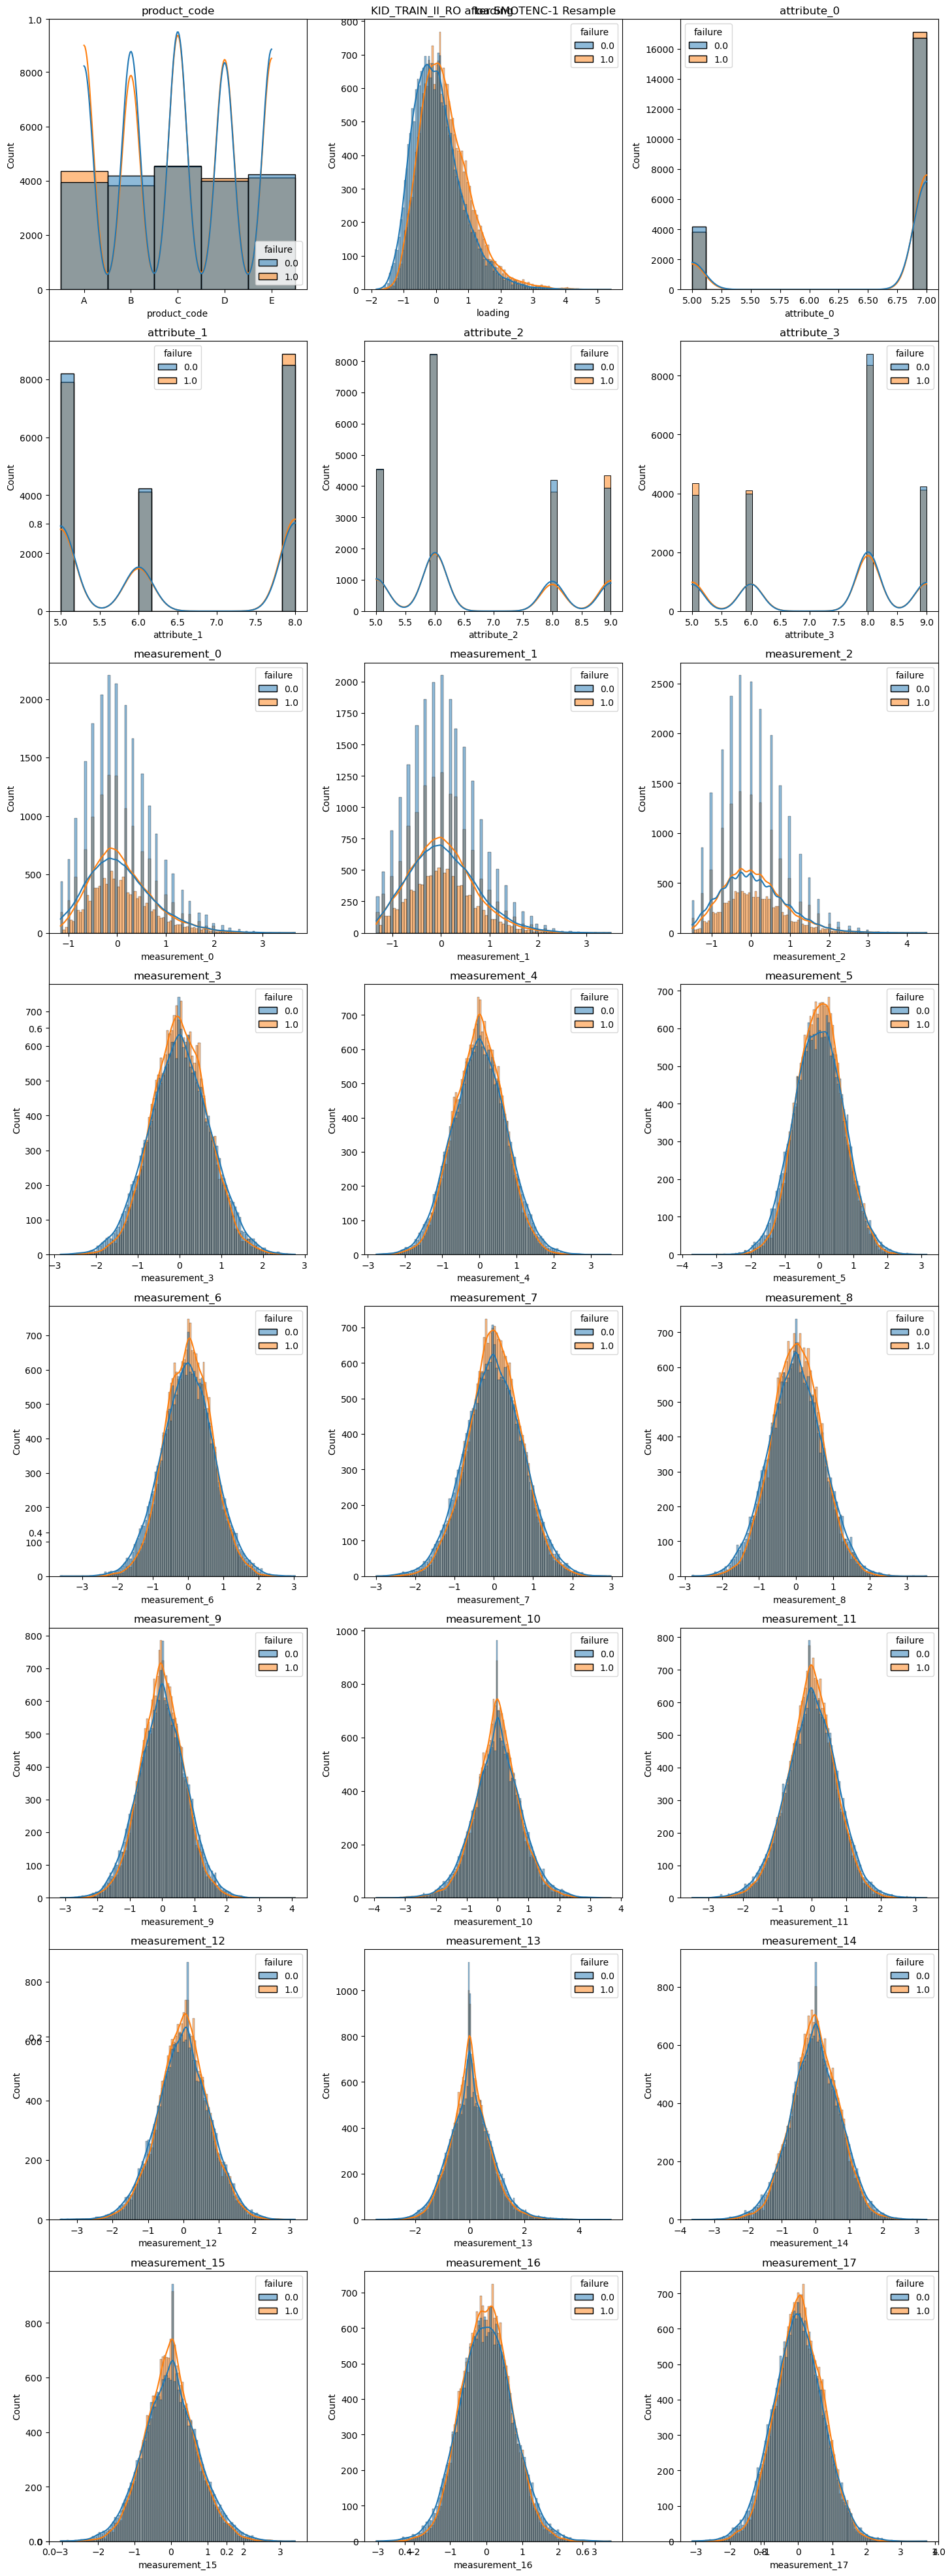

In [52]:
fig = plt.figure(figsize=(15, 40))
plt.title("KID_TRAIN_II_RO after SMOTENC-1 Resample")

for i, feat in enumerate(df_ii_smotenc_1.columns[:-1]):
    ax = fig.add_subplot(8, 3, i+1)
    sns.histplot(data=df_ii_smotenc_1, x=feat, hue="failure", kde=True, axes=ax)
    ax.set_title(feat)

fig.tight_layout()
plt.show()

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

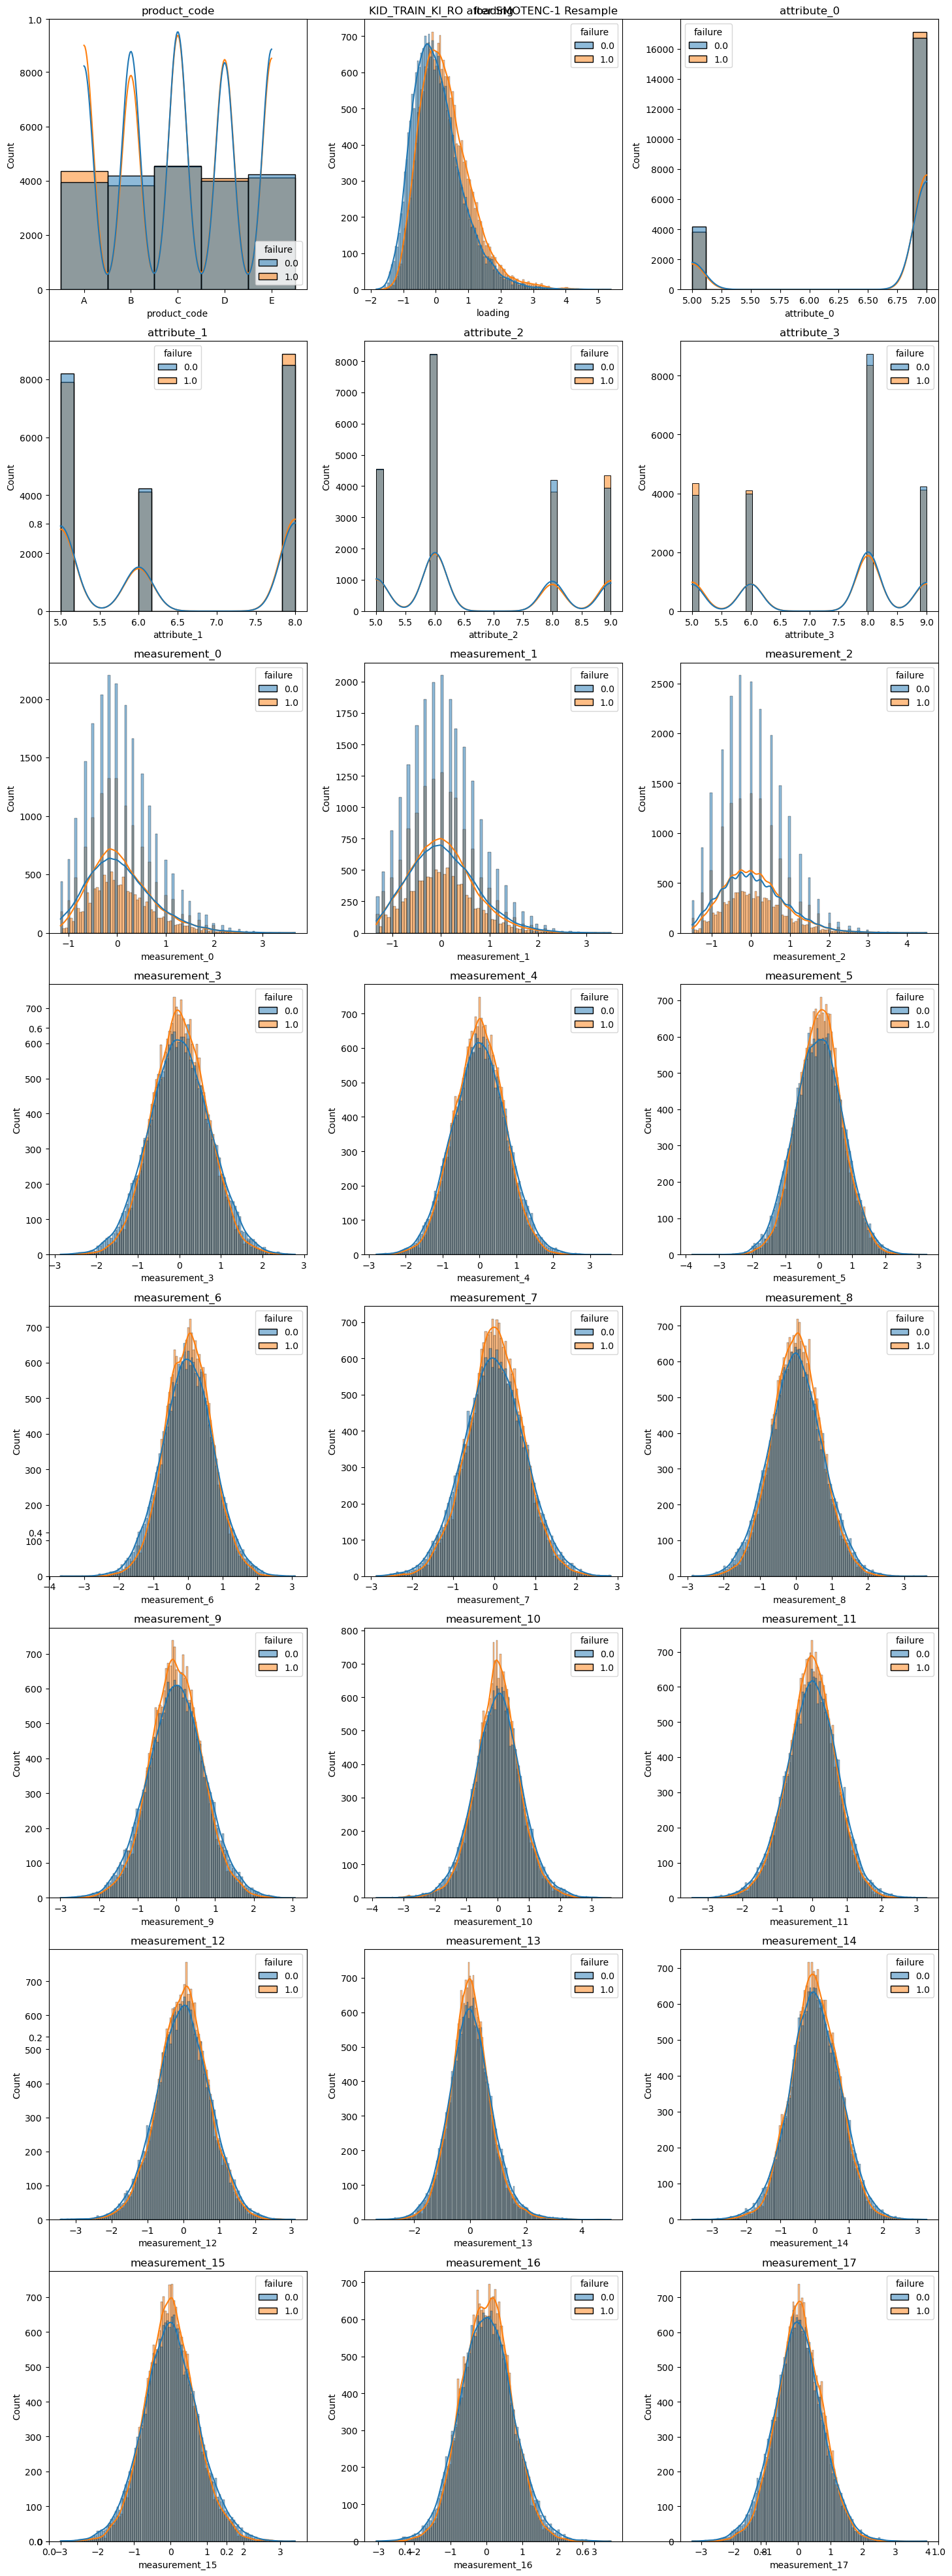

In [53]:
fig = plt.figure(figsize=(15, 40))
plt.title("KID_TRAIN_KI_RO after SMOTENC-1 Resample")

for i, feat in enumerate(df_ki_smotenc_1.columns[:-1]):
    ax = fig.add_subplot(8, 3, i+1)
    sns.histplot(data=df_ki_smotenc_1, x=feat, hue="failure", kde=True, axes=ax)
    ax.set_title(feat)

fig.tight_layout()
plt.show()

### SMOTENC v.1 Export

In [54]:
df_ii_smotenc_1.to_csv('kid_train_ii_ro_smotenc_1.csv')
df_ki_smotenc_1.to_csv('kid_train_ki_ro_smotenc_1.csv')

## Handling other datasets

In [83]:
def imbalance(data, target_class, export_file_name, categorical_features=[], to_drop=[], to_drop_smotenc=[]):
    
    X = data.copy()
    y = X.pop(target_class)

    X_drop = X.drop(to_drop, axis=1)
    X_drop_smotenc = X.drop(to_drop_smotenc, axis=1)

    X_ros, y_ros = random_oversample(X_drop, y)
    X_rus, y_rus = random_undersample(X_drop, y)
    X_smotenc_1, y_smotenc_1 = smotenc(X_drop_smotenc, y, categorical_features)
    X_smote, y_smote = smote(X_drop, y)
    X_adasyn, y_adasyn = adasyn(X_drop, y)

    df_ros = pd.concat([X_ros, y_ros], axis=1)
    df_rus = pd.concat([X_rus, y_rus], axis=1)
    df_smotenc_1 = pd.concat([X_smotenc_1, y_smotenc_1], axis=1)
    df_smote = pd.concat([X_smote, y_smote], axis=1)
    df_adasyn = pd.concat([X_adasyn, y_adasyn], axis=1)

    df_ros.to_csv(f"{export_file_name}_ros.csv")
    df_rus.to_csv(f"{export_file_name}_rus.csv")
    df_smotenc_1.to_csv(f"{export_file_name}_smotenc_1.csv")
    df_smote.to_csv(f"{export_file_name}_smote.csv")
    df_adasyn.to_csv(f"{export_file_name}_adasyn.csv")


In [84]:
to_drop = ['id','product_code', 'product_code_A', 'product_code_B', 'product_code_C', 'product_code_D', 'product_code_E']
to_drop_smotenc_1 = ['id', 'product_code_A', 'product_code_B', 'product_code_C', 'product_code_D', 'product_code_E']
cat_feats_smotenc_1 = ['product_code']
target_class = 'failure'

df_ii_mm = pd.read_csv('kid_train_ii_mm.csv', index_col=0)
df_ii_st = pd.read_csv('kid_train_ii_st.csv', index_col=0)
df_ii_ro = pd.read_csv('kid_train_ii_ro.csv', index_col=0)

df_ki_mm = pd.read_csv('kid_train_ki_mm.csv', index_col=0)
df_ki_st = pd.read_csv('kid_train_ki_st.csv', index_col=0)
df_ki_ro = pd.read_csv('kid_train_ki_ro.csv', index_col=0)

In [85]:
imbalance(data=df_ii_mm, target_class=target_class, export_file_name='kid_train_ii_mm', 
            categorical_features=cat_feats_smotenc_1, to_drop=to_drop, to_drop_smotenc=to_drop_smotenc_1)

In [86]:
imbalance(data=df_ii_st, target_class=target_class, export_file_name='kid_train_ii_st', 
            categorical_features=cat_feats_smotenc_1, to_drop=to_drop, to_drop_smotenc=to_drop_smotenc_1)
imbalance(data=df_ii_ro, target_class=target_class, export_file_name='kid_train_ii_ro', 
            categorical_features=cat_feats_smotenc_1, to_drop=to_drop, to_drop_smotenc=to_drop_smotenc_1)
imbalance(data=df_ki_mm, target_class=target_class, export_file_name='kid_train_ki_mm', 
            categorical_features=cat_feats_smotenc_1, to_drop=to_drop, to_drop_smotenc=to_drop_smotenc_1)
imbalance(data=df_ki_st, target_class=target_class, export_file_name='kid_train_ki_st', 
            categorical_features=cat_feats_smotenc_1, to_drop=to_drop, to_drop_smotenc=to_drop_smotenc_1)
imbalance(data=df_ki_ro, target_class=target_class, export_file_name='kid_train_ki_ro', 
            categorical_features=cat_feats_smotenc_1, to_drop=to_drop, to_drop_smotenc=to_drop_smotenc_1)